# fxデータ読み込み

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('./module')
from utils import cum_std, log_diff, log_diff_inv, load_fx_data
from kalman_filters import LinearKalmanFilter as LKF
from kalman_filters import ExtendedKalmanFilter as EnKF


np.random.seed(0)

In [11]:
instrument_list = ['USD_JPY', 'GBP_JPY', 'EUR_JPY']

df_dict_train = load_fx_data(instrument_list, data_kind='train')
df_dict_test = load_fx_data(instrument_list, data_kind='test')

df_dict_train['EUR_JPY']

,Open_ask,High_ask,Low_ask,Close_ask,Volume,Open_bid,High_bid,Low_bid,Close_bid
Time,,,,,,,,,
2014-01-01 22:00:00+00:00,144.926,145.163,142.859,143.366,143014,144.776,145.108,142.838,143.228
2014-01-02 22:00:00+00:00,143.387,143.387,141.975,142.527,113868,143.237,143.306,141.951,142.412
2014-01-05 22:00:00+00:00,142.515,142.793,141.512,142.080,125100,142.464,142.775,141.491,142.007
2014-01-06 22:00:00+00:00,142.080,142.600,141.951,142.449,115303,142.006,142.584,141.930,142.377
2014-01-07 22:00:00+00:00,142.449,143.184,142.130,142.405,128572,142.380,143.161,142.109,142.316
...,...,...,...,...,...,...,...,...,...
2018-12-03 22:00:00+00:00,129.037,129.065,127.632,127.951,26900,128.927,129.019,127.613,127.901
2018-12-04 22:00:00+00:00,127.989,128.502,127.801,128.439,16113,127.939,128.483,127.782,128.389
2018-12-05 22:00:00+00:00,128.433,128.468,127.683,128.214,37536,128.383,128.418,127.663,128.164


In [18]:
df_dict_log_train = {}
for instrument in df_dict_train.keys():
    df_stable = df_dict[instrument].copy()
    for column in df_stable.columns:
        df_stable[column] = log_diff(df_stable[column].values)
    df_dict_log_train[instrument] = df_stable

df_dict_log_test = {}
for instrument in df_dict_test.keys():
    df_stable = df_dict_test[instrument].copy()
    for column in df_stable.columns:
        df_stable[column] = log_diff(df_stable[column].values)
    df_dict_log_test[instrument] = df_stable
df_dict_log_test['USD_JPY']

,Open_ask,High_ask,Low_ask,Close_ask,Volume,Open_bid,High_bid,Low_bid,Close_bid
Time,,,,,,,,,
2019-01-01 22:00:00+00:00,4.697202,4.698077,4.688748,4.690770,10.333840,4.696290,4.697913,4.688610,4.689851
2019-01-02 22:00:00+00:00,-0.006983,-0.007051,-0.036036,-0.011504,0.714029,-0.006365,-0.007722,-0.036852,-0.011115
2019-01-03 22:00:00+00:00,-0.010860,-0.003374,0.024993,0.008092,-0.247968,-0.011105,-0.002676,0.025807,0.007700
2019-01-06 22:00:00+00:00,0.008009,0.001463,0.004713,0.001519,-0.551655,0.007690,0.001454,0.004705,0.002155
2019-01-07 22:00:00+00:00,0.001509,0.003112,0.003880,0.000202,-0.053060,0.002081,0.003140,0.003779,0.000101
...,...,...,...,...,...,...,...,...,...
2019-12-23 22:00:00+00:00,-0.000740,-0.000858,-0.000110,0.000155,0.233195,-0.000421,-0.000895,-0.000110,-0.000055
2019-12-25 22:00:00+00:00,0.000018,0.002199,0.000329,0.002355,-0.409228,0.000000,0.002218,-0.000073,0.002055
2019-12-26 22:00:00+00:00,0.001972,-0.000365,0.000229,-0.001697,1.101224,0.001672,-0.000821,0.000640,-0.001699


In [35]:
train = df_dict_log_train['USD_JPY']['Close_ask'].values[1:]
test = df_dict_log_test['USD_JPY']['Close_ask'].values[1:]
print(train.shape, test.shape)

(1297,) (274,)


# ARMAモデルの作成

In [ ]:
def generate_state_data(F, G, q, x_0, size):
    """
    モデルノイズは1次元を仮定
    """
    data = np.zeros((size, len(x_0)))
    x = x_0
    data[0] = x
    for i in range(1, size):
        x = F@x + G@np.random.normal(loc=0, scale=q, size=(1,))
        data[i] = x
    return data

def generate_obs_data(H, r, series, noise=True):
    """
    観測ノイズは1次元を仮定
    """
    obs = (H@series.T).T
    if noise:
        obs += np.random.normal(loc=0, scale=r, size=(len(series),1))
    return obs

In [36]:
# ARモデル
p = 3
a = np.array([-0.9, -0.7, -0.5]).reshape(p, 1)

# MAモデル
q = 3 
b = np.array([0.5, 0.5, 0.5])

N = max([p,q+1])
print(f'p = {p}, q = {q}, N = {N}')

# a, bを0拡張
if N > p:
    a_N = np.vstack([a, np.zeros(N-p)])
else:
    a_N = a

if N > q+1:
    b_N = np.hstack([b, np.zeros(N-q-2)])
else:
    b_N = b

# 状態遷移行列 (N, N)
F = np.block([a_N, np.vstack([np.eye(N-1), np.zeros((1, N-1))])])
print(f'F = \n{F}')

# ノイズ重み (N, 1), b_0=1を含む． 
G = np.array([1, *b_N]).reshape(N, 1)
print(f'G = \n{G}')

# 観測モデル (1, N)
H = np.block([1, np.zeros((1, N-1))])
print(f'H_ma = \n{H}')

# モデルノイズstd
sigma_m = 1
q = sigma_m
Q = np.array([q])
# 観測ノイズstd
sigma_o = 0.5
r = sigma_o
R = np.array([r])

p = 3, q = 3, N = 4
F = 
[[-0.9  1.   0.   0. ]
 [-0.7  0.   1.   0. ]
 [-0.5  0.   0.   1. ]
 [ 0.   0.   0.   0. ]]
G = 
[[1. ]
 [0.5]
 [0.5]
 [0.5]]
H_ma = 
[[1. 0. 0. 0.]]


In [52]:
# パラメータ推定モデル

In [37]:
# y = train
# x_0 = np.random.choice(train, N)
# P_0 = 10*np.eye(N)
# lkf = LKF(F, H, G, Q, R, y, x_0, P_0, alpha=1)
# lkf.forward_estimation()
# estimate_data = (H@(np.array(lkf.x)).T).T

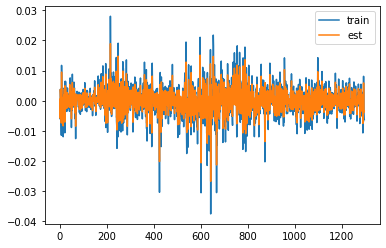

In [51]:
# plt.plot(train, label='train')
# plt.plot(estimate_data, label='est')
# plt.legend()

# 推定